In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
coverage_data = pd.read_excel('./Data/coverage-data.xlsx')
incident_data = pd.read_excel('./Data/incidence-rate-data.xlsx')
reported_cases_data = pd.read_excel('./Data/reported-cases-data.xlsx')
vaccine_intro_data = pd.read_excel('./Data/vaccine-introduction-data.xlsx')
vaccine_schedule_data = pd.read_excel('./Data/vaccine-schedule-data.xlsx')


## Coverage_data

In [45]:
df = coverage_data
# checking for missing values

df.isna().sum()

GROUP                            0
CODE                             0
NAME                             0
YEAR                             0
ANTIGEN                          0
ANTIGEN_DESCRIPTION              0
COVERAGE_CATEGORY                0
COVERAGE_CATEGORY_DESCRIPTION    0
TARGET_NUMBER                    0
DOSES                            0
COVERAGE                         0
dtype: int64

In [46]:
df.dropna(subset= ['CODE','NAME','YEAR'], inplace= True)

In [47]:
# imputing missing values

df['TARGET_NUMBER'] = df.groupby(['ANTIGEN'])['TARGET_NUMBER'].transform(lambda x: x.fillna(x.median()))

df['DOSES'] = df.groupby(['ANTIGEN'])['DOSES'].transform(lambda x: x.fillna(x.median()))

df['COVERAGE'] = df.groupby(['ANTIGEN'])['COVERAGE'].transform(lambda x: x.fillna(x.median()))

# Normalizing the coverage
df['COVERAGE'] = df['COVERAGE'].apply(lambda x: x * 100 if pd.notna(x) and x < 1 else x)

# Converting  Year, TARGET_NUMBER, DOSES columns to integer
df['YEAR'] = df['YEAR'].astype(int)
df['TARGET_NUMBER'] = df['TARGET_NUMBER'].astype(int)
df['DOSES'] = df['DOSES'].astype(int)

In [48]:
df.isna().sum()

GROUP                            0
CODE                             0
NAME                             0
YEAR                             0
ANTIGEN                          0
ANTIGEN_DESCRIPTION              0
COVERAGE_CATEGORY                0
COVERAGE_CATEGORY_DESCRIPTION    0
TARGET_NUMBER                    0
DOSES                            0
COVERAGE                         0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398584 entries, 0 to 399857
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   GROUP                          398584 non-null  object 
 1   CODE                           398584 non-null  object 
 2   NAME                           398584 non-null  object 
 3   YEAR                           398584 non-null  int64  
 4   ANTIGEN                        398584 non-null  object 
 5   ANTIGEN_DESCRIPTION            398584 non-null  object 
 6   COVERAGE_CATEGORY              398584 non-null  object 
 7   COVERAGE_CATEGORY_DESCRIPTION  398584 non-null  object 
 8   TARGET_NUMBER                  398584 non-null  int64  
 9   DOSES                          398584 non-null  int64  
 10  COVERAGE                       398584 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 36.5+ MB


In [50]:
df

,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,ABW,Aruba,2023,BCG,BCG,ADMIN,Administrative coverage,405776,361947,92.00
1,COUNTRIES,ABW,Aruba,2023,BCG,BCG,OFFICIAL,Official coverage,405776,361947,92.00
2,COUNTRIES,ABW,Aruba,2023,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044,945,90.52
3,COUNTRIES,ABW,Aruba,2023,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,65501,56755,90.52
4,COUNTRIES,ABW,Aruba,2023,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219,1008,82.69
...,...,...,...,...,...,...,...,...,...,...,...
399853,WHO_REGIONS,WPR,Western Pacific Region,1980,DTPCV3,"DTP-containing vaccine, 3rd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588,2273390,8.00
399854,WHO_REGIONS,WPR,Western Pacific Region,1980,MCV1,"Measles-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588,1209026,4.00
399855,WHO_REGIONS,WPR,Western Pacific Region,1980,PAB,Protection at birth (PAB) against neonatal tet...,PAB,PAB Estimates,4494513,276306,6.00
399856,WHO_REGIONS,WPR,Western Pacific Region,1980,POL3,"Polio, 3rd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588,1296611,5.00


In [51]:
cleaned_file_path = "./Data/cleaned_coverage_data.csv"
df.to_csv(cleaned_file_path, index=False)

### EDA

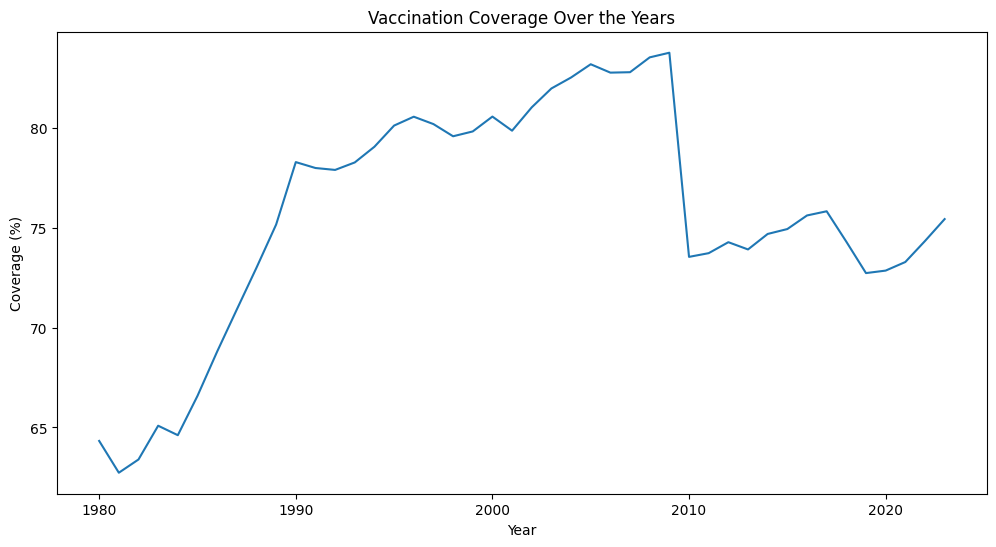

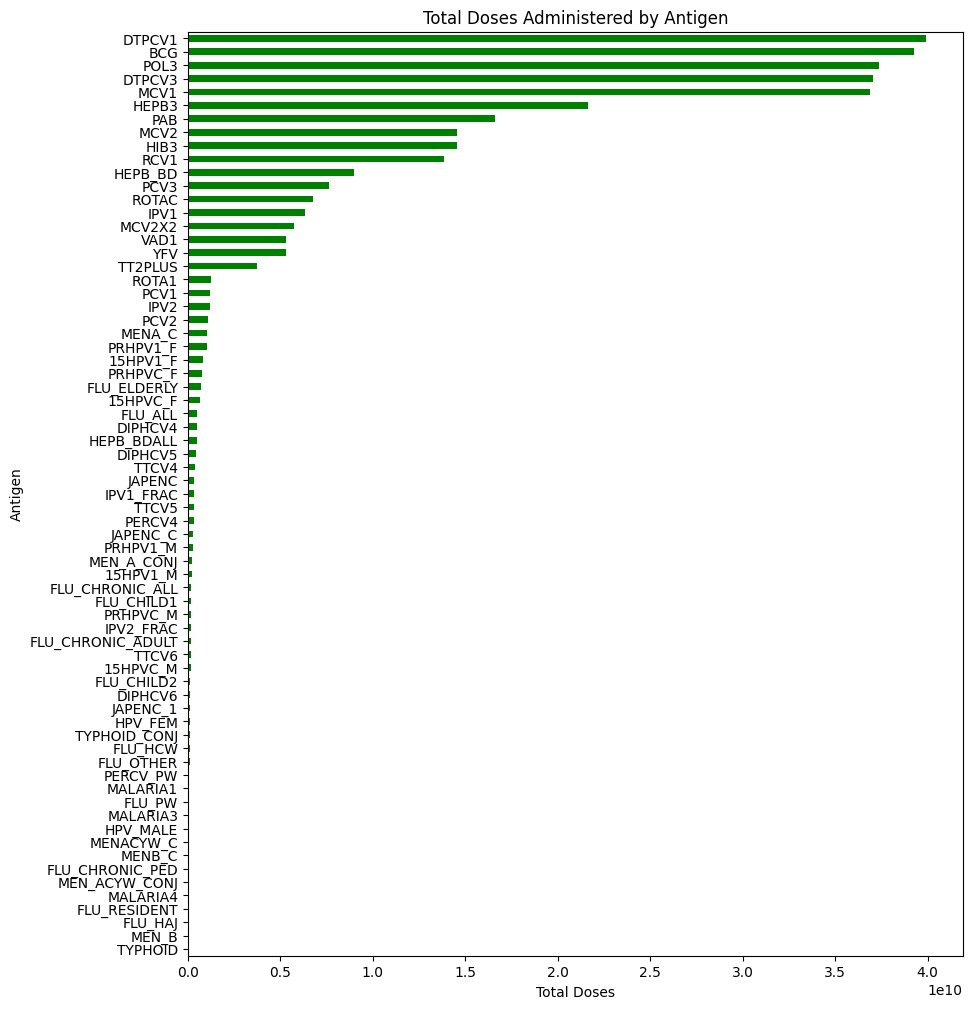

In [52]:
# Coverage over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='YEAR', y='COVERAGE', errorbar=None)
plt.title('Vaccination Coverage Over the Years')
plt.xlabel('Year')
plt.ylabel('Coverage (%)')
plt.show()




# Calculate total doses by ANTIGEN
total_doses_by_antigen = df.groupby('ANTIGEN')['DOSES'].sum().sort_values()

# Plot the total doses by ANTIGEN
plt.figure(figsize=(10, 12))
total_doses_by_antigen.plot(kind='barh', color='green')
plt.title('Total Doses Administered by Antigen')
plt.xlabel('Total Doses')
plt.ylabel('Antigen')
plt.show()

## Incidence Data

In [11]:
df = incident_data
df

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,"per 1,000,000 total population",NaN
4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,"per 1,000,000 total population",0.0
...,...,...,...,...,...,...,...,...
84941,COUNTRIES,ZWE,Zimbabwe,1980.0,PERTUSSIS,Pertussis,"per 1,000,000 total population",893.3
84942,COUNTRIES,ZWE,Zimbabwe,1980.0,POLIO,Poliomyelitis,"per 1,000,000 <15 population",NaN
84943,COUNTRIES,ZWE,Zimbabwe,1980.0,TTETANUS,Total tetanus,"per 1,000,000 total population",19.7
84944,COUNTRIES,ZWE,Zimbabwe,1980.0,YFEVER,Yellow fever,"per 1,000,000 total population",NaN


In [12]:
# handling missing values
df.dropna(subset= ['CODE', 'NAME', 'YEAR'], inplace=True)

In [13]:
# Imputing missing values

df['INCIDENCE_RATE'] = df.groupby(['DISEASE'])['INCIDENCE_RATE'].transform(lambda x: x.fillna(x.median()))



In [14]:
# converting year to int
df['YEAR'] = df['YEAR'].astype(int)


In [15]:
df

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,COUNTRIES,ABW,Aruba,2023,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,COUNTRIES,ABW,Aruba,2023,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,COUNTRIES,ABW,Aruba,2023,MEASLES,Measles,"per 1,000,000 total population",16.5
4,COUNTRIES,ABW,Aruba,2023,MUMPS,Mumps,"per 1,000,000 total population",0.0
...,...,...,...,...,...,...,...,...
84940,COUNTRIES,ZWE,Zimbabwe,1980,NTETANUS,Neonatal tetanus,"per 1,000 live births",0.4
84941,COUNTRIES,ZWE,Zimbabwe,1980,PERTUSSIS,Pertussis,"per 1,000,000 total population",893.3
84942,COUNTRIES,ZWE,Zimbabwe,1980,POLIO,Poliomyelitis,"per 1,000,000 <15 population",0.0
84943,COUNTRIES,ZWE,Zimbabwe,1980,TTETANUS,Total tetanus,"per 1,000,000 total population",19.7


In [16]:
cleaned_file_path = "./Data/cleaned_incidence_data.csv"
df.to_csv(cleaned_file_path, index=False)

### EDA

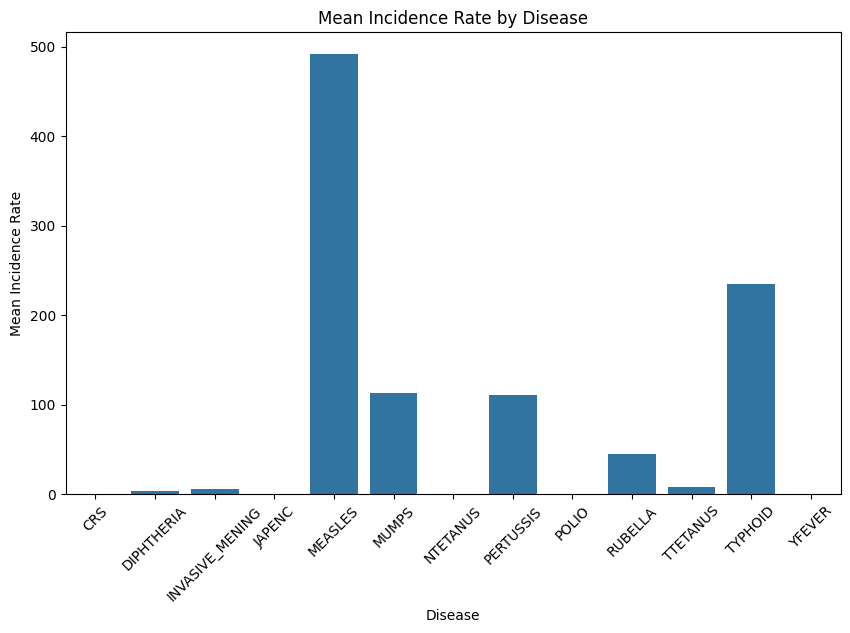

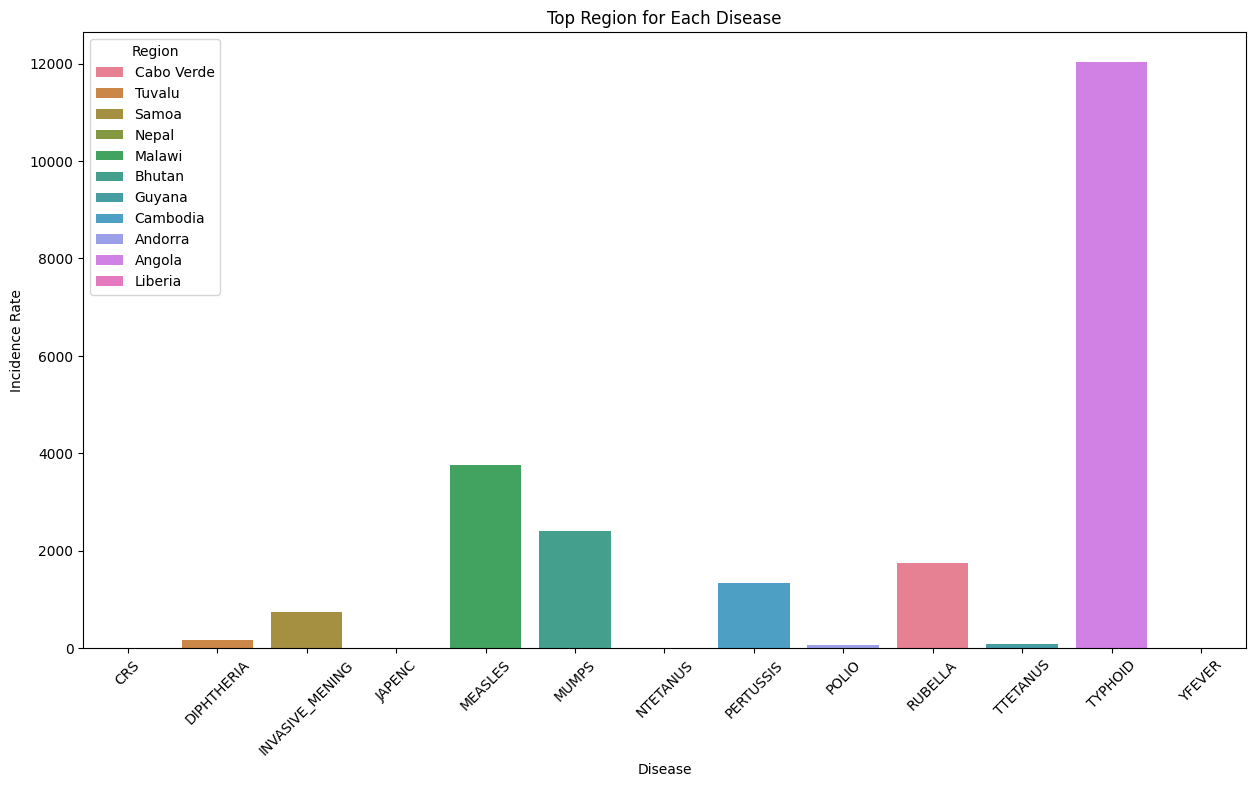

In [17]:
# incidence rate for each disease
disease_rates = df.groupby('DISEASE')['INCIDENCE_RATE'].mean().reset_index()
# Disease Burden plotting for mean incidence rate of each disease
plt.figure(figsize=(10, 6))
sns.barplot(x="DISEASE", y="INCIDENCE_RATE", data=disease_rates)
plt.xlabel("Disease")
plt.ylabel("Mean Incidence Rate")
plt.title("Mean Incidence Rate by Disease")
plt.xticks(rotation=45)
plt.show()
# Calculating Mean Incidence Rate for Each Region and Disease
regional_rates = df.groupby(["NAME", "DISEASE"])["INCIDENCE_RATE"].mean().reset_index()
# region with the highest incidence rate for each disease
top_regions_per_disease = regional_rates.loc[regional_rates.groupby('DISEASE')['INCIDENCE_RATE'].idxmax()]
# top regions based on disease and incidence rate 
plt.figure(figsize=(15, 8))
sns.barplot(x="DISEASE", y="INCIDENCE_RATE", hue="NAME", data=top_regions_per_disease)
plt.xlabel("Disease")
plt.ylabel("Incidence Rate")
plt.title("Top Region for Each Disease")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()

## Reported_data

In [18]:
df = reported_cases_data
df

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,CASES
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,0.0
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,0.0
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,1.0
3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,NaN
4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,0.0
...,...,...,...,...,...,...,...
84865,COUNTRIES,ZWE,Zimbabwe,1980.0,PERTUSSIS,Pertussis,6290.0
84866,COUNTRIES,ZWE,Zimbabwe,1980.0,POLIO,Poliomyelitis,32.0
84867,COUNTRIES,ZWE,Zimbabwe,1980.0,TTETANUS,Total tetanus,139.0
84868,COUNTRIES,ZWE,Zimbabwe,1980.0,YFEVER,Yellow fever,NaN


In [19]:
df.isna().sum()

GROUP                      0
CODE                       1
NAME                       1
YEAR                       1
DISEASE                    1
DISEASE_DESCRIPTION        1
CASES                  19400
dtype: int64

In [20]:
df.dropna(subset=['CODE','NAME','YEAR'],inplace=True)

In [21]:
# imputing the missing values
df['CASES'] = df.groupby(['DISEASE'])['CASES'].transform(lambda x: x.fillna(x.median()))

In [22]:
# Convert YEAR,CASES to integer

df['YEAR'] = df['YEAR'].astype(int)

df['CASES'] = df['CASES'].astype(int)

In [23]:
df

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,CASES
0,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,0
1,COUNTRIES,ABW,Aruba,2023,DIPHTHERIA,Diphtheria,0
2,COUNTRIES,ABW,Aruba,2023,INVASIVE_MENING,Invasive meningococcal disease,1
3,COUNTRIES,ABW,Aruba,2023,MEASLES,Measles,104
4,COUNTRIES,ABW,Aruba,2023,MUMPS,Mumps,0
...,...,...,...,...,...,...,...
84864,COUNTRIES,ZWE,Zimbabwe,1980,NTETANUS,Neonatal tetanus,134
84865,COUNTRIES,ZWE,Zimbabwe,1980,PERTUSSIS,Pertussis,6290
84866,COUNTRIES,ZWE,Zimbabwe,1980,POLIO,Poliomyelitis,32
84867,COUNTRIES,ZWE,Zimbabwe,1980,TTETANUS,Total tetanus,139


In [24]:
cleaned_file_path = "./Data/cleaned_reported_data.csv"
df.to_csv(cleaned_file_path, index=False)

### EDA

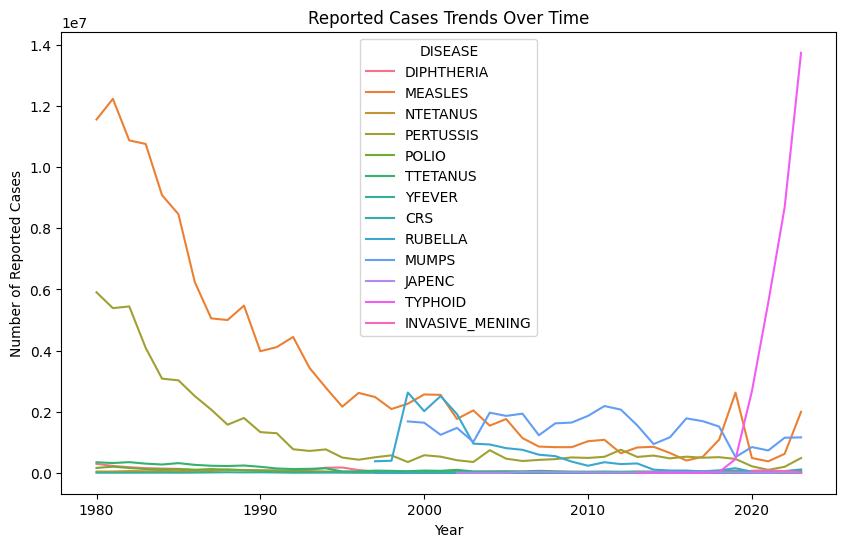

DISEASE
CRS                    28650
DIPHTHERIA           2908251
INVASIVE_MENING       207948
JAPENC                225494
MEASLES            144146481
MUMPS               36406001
NTETANUS             1503802
PERTUSSIS           53158249
POLIO                1623271
RUBELLA             16659243
TTETANUS             4894139
TYPHOID             31153514
YFEVER                132678
Name: CASES, dtype: int64


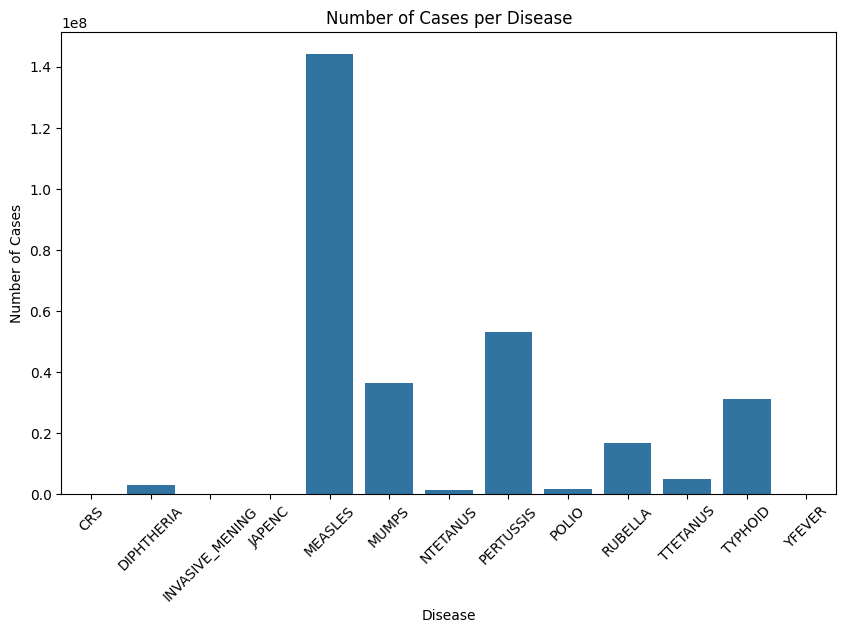

In [25]:
# Calculating the Number of Reported Cases for Each Disease Over Time
cases_over_time = df.groupby(['YEAR', 'DISEASE'])['CASES'].sum().reset_index()
# Disease Incidence Trends:
plt.figure(figsize=(10, 6))
sns.lineplot(x="YEAR", y="CASES", hue="DISEASE", data=cases_over_time)
plt.xlabel("Year")
plt.ylabel("Number of Reported Cases")
plt.title("Reported Cases Trends Over Time")
plt.show()
# Calculate the number of cases for each disease
disease_counts = df.groupby("DISEASE")["CASES"].sum()
print(disease_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values) 
plt.xlabel("Disease")
plt.ylabel("Number of Cases")
plt.title("Number of Cases per Disease")
plt.xticks(rotation=45)
plt.show()

## Vaccine Inroduction Data

In [26]:
df = vaccine_intro_data
df

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,DESCRIPTION,INTRO
0,AFG,Afghanistan,EMRO,2023.0,aP (acellular pertussis) vaccine,No
1,AFG,Afghanistan,EMRO,2023.0,Hepatitis A vaccine,No
2,AFG,Afghanistan,EMRO,2023.0,Hepatitis B vaccine,Yes
3,AFG,Afghanistan,EMRO,2023.0,HepB birth dose,Yes
4,AFG,Afghanistan,EMRO,2023.0,Hib (Haemophilus influenzae type B) vaccine,Yes
...,...,...,...,...,...,...
138316,ZWE,Zimbabwe,AFRO,1943.0,Seasonal Influenza vaccine,No
138317,ZWE,Zimbabwe,AFRO,1942.0,Seasonal Influenza vaccine,No
138318,ZWE,Zimbabwe,AFRO,1941.0,Seasonal Influenza vaccine,No
138319,ZWE,Zimbabwe,AFRO,1940.0,Seasonal Influenza vaccine,No


In [27]:
df.isna().sum()

ISO_3_CODE     0
COUNTRYNAME    1
WHO_REGION     1
YEAR           1
DESCRIPTION    1
INTRO          1
dtype: int64

In [28]:
# removing null values

df.dropna(subset=['YEAR'], inplace=True)

In [29]:
#converting YEAR to int

df['YEAR']= df['YEAR'].astype(int)

In [30]:
df

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,DESCRIPTION,INTRO
0,AFG,Afghanistan,EMRO,2023,aP (acellular pertussis) vaccine,No
1,AFG,Afghanistan,EMRO,2023,Hepatitis A vaccine,No
2,AFG,Afghanistan,EMRO,2023,Hepatitis B vaccine,Yes
3,AFG,Afghanistan,EMRO,2023,HepB birth dose,Yes
4,AFG,Afghanistan,EMRO,2023,Hib (Haemophilus influenzae type B) vaccine,Yes
...,...,...,...,...,...,...
138315,ZWE,Zimbabwe,AFRO,1944,Seasonal Influenza vaccine,No
138316,ZWE,Zimbabwe,AFRO,1943,Seasonal Influenza vaccine,No
138317,ZWE,Zimbabwe,AFRO,1942,Seasonal Influenza vaccine,No
138318,ZWE,Zimbabwe,AFRO,1941,Seasonal Influenza vaccine,No


In [31]:
cleaned_file_path = "./Data/cleaned_vaccine_introduction_data.csv"
df.to_csv(cleaned_file_path, index=False)

### EDA

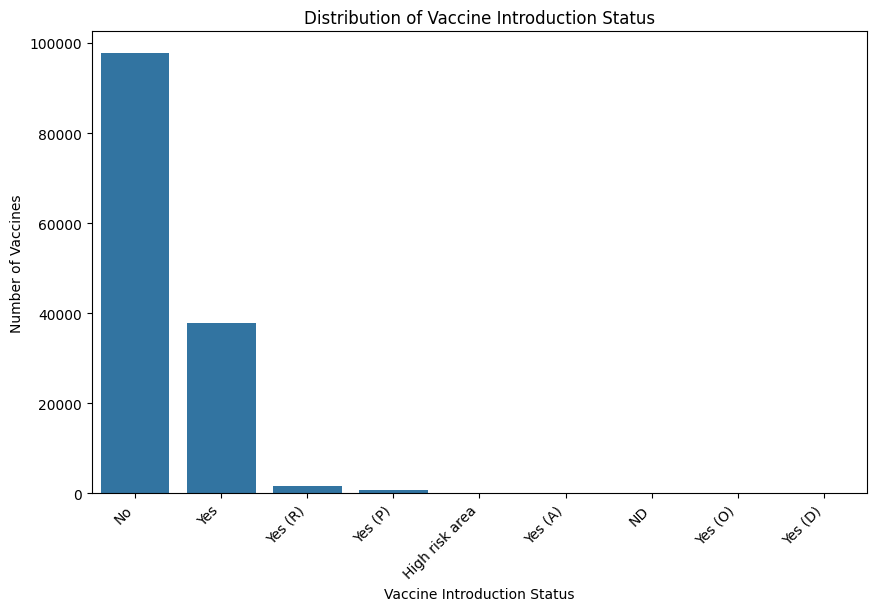

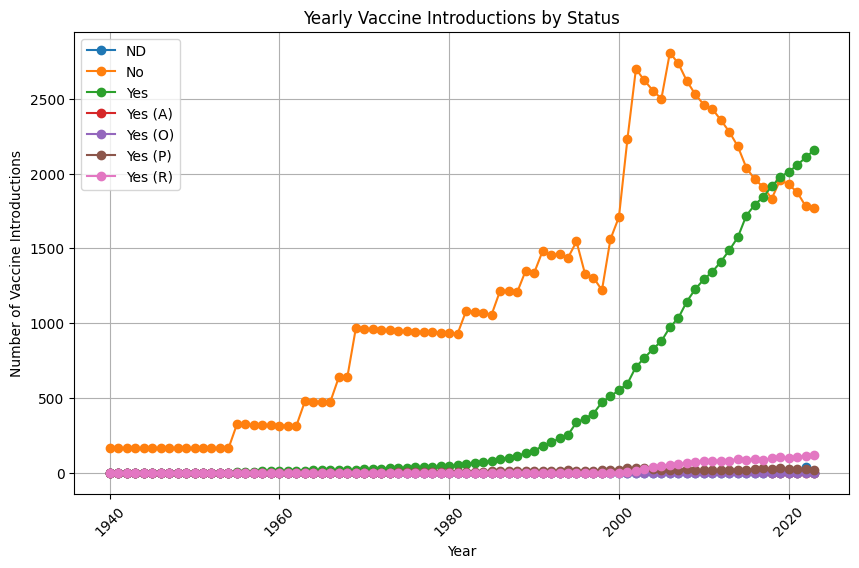

In [32]:
# Count occurrences of each INTRO value
intro_counts = df['INTRO'].value_counts()
intro_counts
plt.figure(figsize=(10, 6))
sns.barplot(x=intro_counts.index, y=intro_counts.values)
plt.xlabel("Vaccine Introduction Status")
plt.ylabel("Number of Vaccines")
plt.title("Distribution of Vaccine Introduction Status")
plt.xticks(rotation=45, ha='right')
plt.show()


intro_statuses = ['Yes', 'Yes (P)', 'Yes (R)', 'Yes (A)', 'Yes (O)', 'Yes (S)', 'Yes (OPV)', 'High risk','No', 'No (D)', 'ND', 'NR']
introduced_vaccines = df[df['INTRO'].isin(intro_statuses)]


# Group by YEAR and INTRO and count occurrences
yearly_intro_counts = introduced_vaccines.groupby(['YEAR', 'INTRO']).size().reset_index(name='Count')

# Pivot table to reshape data
yearly_intro_pivot = yearly_intro_counts.pivot(index='YEAR', columns='INTRO', values='Count').fillna(0)

# Each introduction status
plt.figure(figsize=(10, 6))
for col in yearly_intro_pivot.columns:
    plt.plot(yearly_intro_pivot.index, yearly_intro_pivot[col], label=col, marker='o')

plt.xlabel("Year")
plt.ylabel("Number of Vaccine Introductions")
plt.title("Yearly Vaccine Introductions by Status")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Vaccine_Schedule_data

In [33]:
df = vaccine_schedule_data
df

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,VACCINECODE,VACCINE_DESCRIPTION,SCHEDULEROUNDS,TARGETPOP,TARGETPOP_DESCRIPTION,GEOAREA,AGEADMINISTERED,SOURCECOMMENT
0,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,1.0,NaN,General/routine,NATIONAL,M2,NaN
1,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,2.0,NaN,General/routine,NATIONAL,M4,NaN
2,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,3.0,NaN,General/routine,NATIONAL,M6,NaN
3,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,4.0,B_2YL_W,General/routine,NATIONAL,M15,NaN
4,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,5.0,B_CHILD_W,General/routine,NATIONAL,Y4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8048,ZWE,Zimbabwe,AFRO,2023.0,VITAMINA,Vitamin A supplements,3.0,NaN,General/routine,NATIONAL,M18,M6-M59
8049,ZWE,Zimbabwe,AFRO,2023.0,VITAMINA,Vitamin A supplements,4.0,NaN,General/routine,NATIONAL,M24,M6-M59
8050,ZWE,Zimbabwe,AFRO,2023.0,VITAMINA,Vitamin A supplements,5.0,NaN,General/routine,NATIONAL,M30,M6-M59
8051,ZWE,Zimbabwe,AFRO,2023.0,VITAMINA,Vitamin A supplements,6.0,NaN,General/routine,NATIONAL,M36,M6-M59


In [34]:
df.isna().sum()

ISO_3_CODE                  0
COUNTRYNAME                 1
WHO_REGION                  1
YEAR                        1
VACCINECODE                 1
VACCINE_DESCRIPTION         1
SCHEDULEROUNDS              1
TARGETPOP                4258
TARGETPOP_DESCRIPTION       1
GEOAREA                    31
AGEADMINISTERED          1046
SOURCECOMMENT            2914
dtype: int64

In [35]:
df.dropna(subset=('YEAR'),inplace=True)

In [36]:
df['WHO_REGION'].unique()

array(['AMRO', 'EMRO', 'AFRO', 'EURO', 'WPRO', 'SEARO'], dtype=object)

In [37]:
df['ISO_3_CODE'].unique()

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD',
       'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA',
       'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN',
       'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN',
       'FJI', 'FRA', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB',
       'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUM', 'GUY', 'HKG', 'HND',
       'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL',
       'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM',
       'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA',
       'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA',
       'MDG', 'MDV', 'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE',
       'MNG', 'MNP',

In [38]:
df['YEAR'] = df['YEAR'].astype(int)
df['SCHEDULEROUNDS'] = df['SCHEDULEROUNDS'].astype(int)

In [39]:
# imputing the missing values
df['AGEADMINISTERED'] = df['AGEADMINISTERED'].fillna(df['AGEADMINISTERED'].mode()[0])

df['TARGETPOP'] = df['TARGETPOP'].fillna(df['TARGETPOP'].mode()[0])

df['SOURCECOMMENT'] = df['SOURCECOMMENT'].fillna('No comment')

df['GEOAREA'] = df['GEOAREA'].fillna('NATIONAL')

In [40]:
df.isna().sum()

ISO_3_CODE               0
COUNTRYNAME              0
WHO_REGION               0
YEAR                     0
VACCINECODE              0
VACCINE_DESCRIPTION      0
SCHEDULEROUNDS           0
TARGETPOP                0
TARGETPOP_DESCRIPTION    0
GEOAREA                  0
AGEADMINISTERED          0
SOURCECOMMENT            0
dtype: int64

In [41]:
df

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,VACCINECODE,VACCINE_DESCRIPTION,SCHEDULEROUNDS,TARGETPOP,TARGETPOP_DESCRIPTION,GEOAREA,AGEADMINISTERED,SOURCECOMMENT
0,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,1,RISKGROUPS,General/routine,NATIONAL,M2,No comment
1,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,2,RISKGROUPS,General/routine,NATIONAL,M4,No comment
2,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,3,RISKGROUPS,General/routine,NATIONAL,M6,No comment
3,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,4,B_2YL_W,General/routine,NATIONAL,M15,No comment
4,ABW,Aruba,AMRO,2023,DTAPIPV,DTaP-IPV (acellular) vaccine,5,B_CHILD_W,General/routine,NATIONAL,Y4,No comment
...,...,...,...,...,...,...,...,...,...,...,...,...
8047,ZWE,Zimbabwe,AFRO,2023,VITAMINA,Vitamin A supplements,2,RISKGROUPS,General/routine,NATIONAL,M12,M6-M59
8048,ZWE,Zimbabwe,AFRO,2023,VITAMINA,Vitamin A supplements,3,RISKGROUPS,General/routine,NATIONAL,M18,M6-M59
8049,ZWE,Zimbabwe,AFRO,2023,VITAMINA,Vitamin A supplements,4,RISKGROUPS,General/routine,NATIONAL,M24,M6-M59
8050,ZWE,Zimbabwe,AFRO,2023,VITAMINA,Vitamin A supplements,5,RISKGROUPS,General/routine,NATIONAL,M30,M6-M59


In [42]:
cleaned_file_path = "./Data/cleaned_vaccine_schedule_data.csv"
df.to_csv(cleaned_file_path, index=False)

### EDA

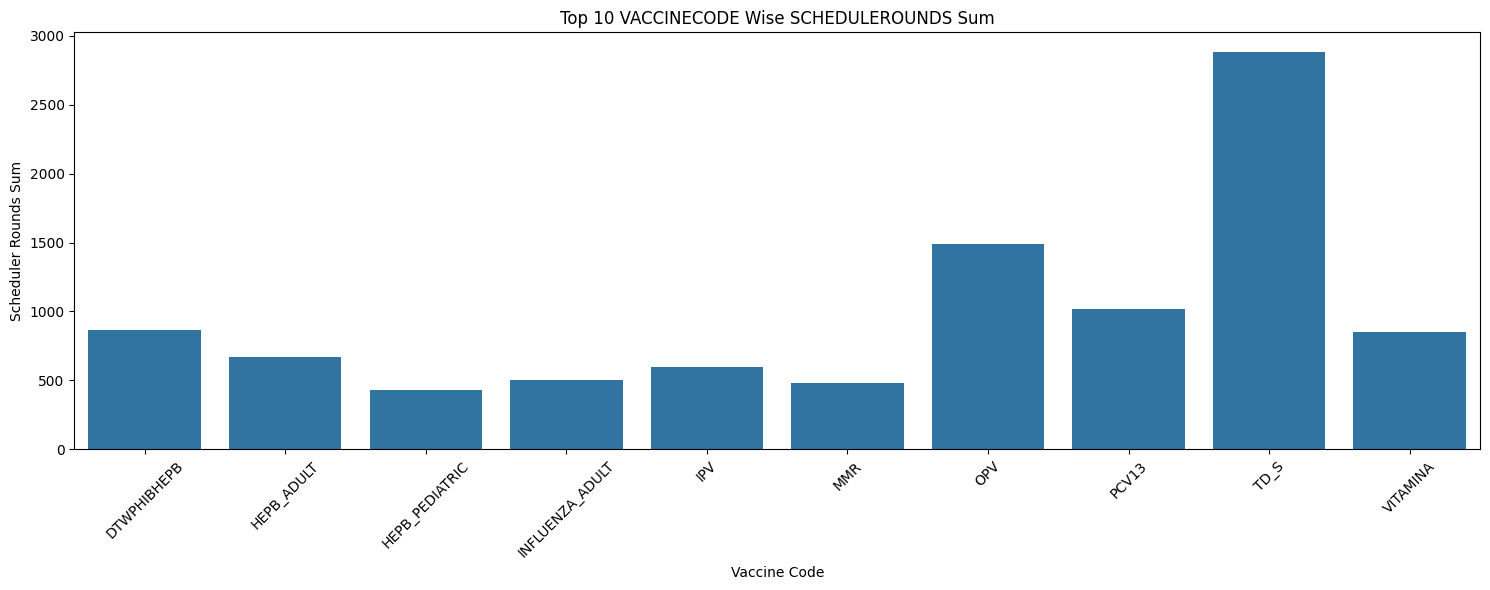

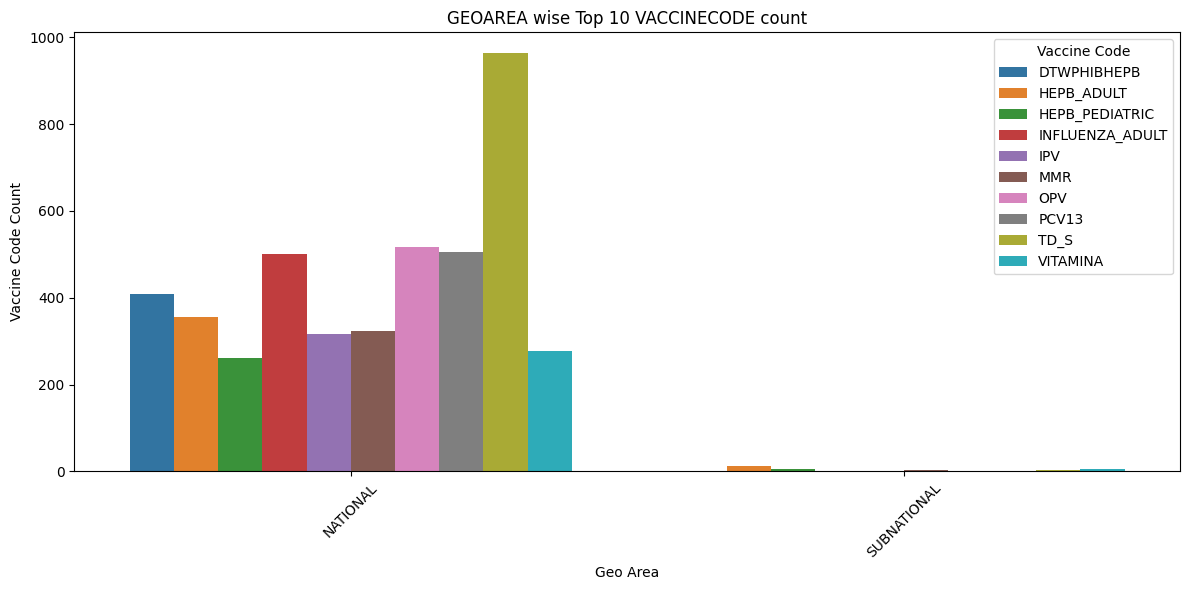

In [43]:
# Filter for top N most frequent VACCINECODE
N = 10
top_vaccine_codes = df['VACCINECODE'].value_counts().nlargest(N).index
filtered_df = df[df['VACCINECODE'].isin(top_vaccine_codes)]


# Top 10 VACCINECODE wise SCHEDULEROUNDS sum
vaccine_schedulerounds_sum = filtered_df.groupby('VACCINECODE')['SCHEDULEROUNDS'].sum().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x='VACCINECODE', y='SCHEDULEROUNDS', data=vaccine_schedulerounds_sum)
plt.title(f'Top {N} VACCINECODE Wise SCHEDULEROUNDS Sum')
plt.xlabel('Vaccine Code')
plt.ylabel('Scheduler Rounds Sum')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# GEOAREA wise top 10 VACCINECODE count
geoarea_vaccine_counts = filtered_df.groupby(['GEOAREA', 'VACCINECODE']).size().reset_index(name='counts')
plt.figure(figsize=(12, 6))
sns.barplot(x='GEOAREA', y='counts', hue='VACCINECODE', data=geoarea_vaccine_counts)
plt.title(f'GEOAREA wise Top {N} VACCINECODE count')
plt.xlabel('Geo Area')
plt.ylabel('Vaccine Code Count')
plt.legend(title='Vaccine Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()